In [1]:
import numpy as np
import pyccl as ccl
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.interpolate as interpol
from pyccl._core import UnlockInstance
from scipy import signal

# BCM

In [3]:
import BCMprofiles_Copy3 as BCMprofiles
BCMprofiles.__all__

/Users/lambe/Documents/GitHub/Oxford-Intern-2024/Oxford-Internship-Practices/BCMprofiles_Copy3.py:12: SyntaxWarning: invalid escape sequence '\ '
  """Creating a class for the stellar density profile
/Users/lambe/Documents/GitHub/Oxford-Intern-2024/Oxford-Internship-Practices/BCMprofiles_Copy3.py:101: SyntaxWarning: invalid escape sequence '\ '
  """Creating a class for the bound gas density profile where:
/Users/lambe/Documents/GitHub/Oxford-Intern-2024/Oxford-Internship-Practices/BCMprofiles_Copy3.py:348: SyntaxWarning: invalid escape sequence '\e'
  """Combined profile for the stellar & ejected & bound gas & cdm components (ie- The BCM Model), with the truncated Navarro-Frenk-White (NFW) profile used to calculate the density profiles of the cold dark matter (cdm) component.


('StellarProfile',
 'EjectedGasProfile',
 'BoundGasProfile',
 'CombinedGasProfile',
 'CombinedStellarGasProfile',
 'CombinedAllBCMProfile')

## Setting up pars & profiles

In [6]:
hmd_200c = ccl.halos.MassDef200c # use a mass definition with Delta = 200
cM = ccl.halos.ConcentrationDuffy08(mass_def=hmd_200c)
cosmo = ccl.Cosmology(Omega_c = 0.25, Omega_b=0.05, h=0.7, A_s=2.1e-9, n_s=0.96, Neff=0, Omega_g=0)
# change h=0.07 to h=0.7

trial_r = np.geomspace(1E-2,1E8,100_000) # geomspace is like linspace, but evenly spaces on a logscale
trial_k = np.geomspace(5E-3,1E2,100_000) # np.geomspace(1E-3,1E2,100000)
trial_M = np.array([3E12,6E13, 1E14])
trial_gamma = 1.1  # working with z = 0 (today) ; therefore a = 1 [default]
trial_f_bd = 0.6

## Loading profiles, with fourier_analytic = True

In [9]:
stel_profile = BCMprofiles.StellarProfile(cosmo, hmd_200c)
ej_profile = BCMprofiles.EjectedGasProfile(cosmo, hmd_200c)
bd_profile = BCMprofiles.BoundGasProfile(cosmo, hmd_200c, cM, fourier_analytic = True)#, trial_gamma)
gas_profile = BCMprofiles.CombinedGasProfile(cosmo, hmd_200c, cM)#, trial_gamma)
stelGas_profile = BCMprofiles.CombinedStellarGasProfile(cosmo, hmd_200c, cM)#, trial_gamma) 
bcm_profile = BCMprofiles.CombinedAllBCMProfile(cosmo, hmd_200c, cM)#, trial_gamma)

In [13]:
stel_real = stel_profile._real(cosmo, trial_r, trial_M)
ej_real = ej_profile._real(cosmo, trial_r, trial_M)
bd_real = bd_profile._real(cosmo, trial_r, trial_M, scale_a=1, Gamma=trial_gamma)
gas_real = gas_profile._real(cosmo, trial_r, trial_M, scale_a=1, Gamma=trial_gamma, f_bd=trial_f_bd)
stelGas_real = stelGas_profile._real(cosmo, trial_r, trial_M, scale_a=1, Gamma=trial_gamma)
bcm_real = bcm_profile._real(cosmo, trial_r, trial_M, scale_a=1, Gamma=trial_gamma)

In [15]:
stel_fourier = stel_profile._fourier(trial_k, trial_M)
ej_fourier = ej_profile._fourier(trial_k, trial_M)

In [17]:
#trial_k = np.geomspace(1E-1,1E0,100_000)
bd_fourier = bd_profile._fourier(k=trial_k, M=trial_M, scale_a=1, Gamma=trial_gamma)

Qany = 1.56% through
Qany = 3.12% through
Qany = 4.69% through
Qany = 6.25% through
Qany = 7.81% through
Qany = 9.38% through
Qany = 10.9% through
Qany = 12.5% through
Qany = 14.1% through
Qany = 15.6% through
Qany = 17.2% through
Qany = 18.8% through
Qany = 20.3% through
Qany = 21.9% through
Qany = 23.4% through
Qany = 25% through
Qany = 26.6% through
Qany = 28.1% through
Qany = 29.7% through
Qany = 31.2% through
Qany = 32.8% through
Qany = 34.4% through
Qany = 35.9% through
Qany = 37.5% through
Qany = 39.1% through
Qany = 40.6% through
Qany = 42.2% through
Qany = 43.8% through
Qany = 45.3% through
Qany = 46.9% through
Qany = 48.4% through
Qany = 50% through
Qany = 51.6% through
Qany = 53.1% through
Qany = 54.7% through
Qany = 56.2% through
Qany = 57.8% through
Qany = 59.4% through
Qany = 60.9% through
Qany = 62.5% through
Qany = 64.1% through
Qany = 65.6% through
Qany = 67.2% through
Qany = 68.8% through
Qany = 70.3% through
Qany = 71.9% through
Qany = 73.4% through
Qany = 75% throug

In [18]:
gas_fourier = gas_profile._fourier(trial_k, trial_M, scale_a=1, f_bd=trial_f_bd)
stelGas_fourier = stelGas_profile._fourier(trial_k, trial_M)
bcm_fourier = bcm_profile._fourier(trial_k, trial_M)

Qany = 1.56% through
Qany = 3.12% through
Qany = 4.69% through
Qany = 6.25% through
Qany = 7.81% through
Qany = 9.38% through
Qany = 10.9% through
Qany = 12.5% through
Qany = 14.1% through
Qany = 15.6% through
Qany = 17.2% through
Qany = 18.8% through
Qany = 20.3% through
Qany = 21.9% through
Qany = 23.4% through
Qany = 25% through
Qany = 26.6% through
Qany = 28.1% through
Qany = 29.7% through
Qany = 31.2% through
Qany = 32.8% through
Qany = 34.4% through
Qany = 35.9% through
Qany = 37.5% through
Qany = 39.1% through
Qany = 40.6% through
Qany = 42.2% through
Qany = 43.8% through
Qany = 45.3% through
Qany = 46.9% through
Qany = 48.4% through
Qany = 50% through
Qany = 51.6% through
Qany = 53.1% through
Qany = 54.7% through
Qany = 56.2% through
Qany = 57.8% through
Qany = 59.4% through
Qany = 60.9% through
Qany = 62.5% through
Qany = 64.1% through
Qany = 65.6% through
Qany = 67.2% through
Qany = 68.8% through
Qany = 70.3% through
Qany = 71.9% through
Qany = 73.4% through
Qany = 75% throug

## Loading profiles, with fourier_analytic = False

In [21]:
stel_profile_false = BCMprofiles.StellarProfile(cosmo, hmd_200c, fourier_analytic=False)
ej_profile_false = BCMprofiles.EjectedGasProfile(cosmo, hmd_200c, fourier_analytic=False)
bd_profile_false = BCMprofiles.BoundGasProfile(cosmo, hmd_200c, cM, fourier_analytic=False)
gas_profile_false = BCMprofiles.CombinedGasProfile(cosmo, hmd_200c, cM, fourier_analytic=False)
stelGas_profile_false = BCMprofiles.CombinedStellarGasProfile(cosmo, hmd_200c, cM, fourier_analytic=False) 
bcm_profile_false = BCMprofiles.CombinedAllBCMProfile(cosmo, hmd_200c, cM, fourier_analytic=False)

In [27]:
stel_real_false = stel_profile_false._real(cosmo, trial_r, trial_M)
ej_real_false = ej_profile_false._real(cosmo, trial_r, trial_M)
bd_real_false = bd_profile_false._real(cosmo, trial_r, trial_M, scale_a=1, Gamma=trial_gamma)
gas_real_false = gas_profile_false._real(cosmo, trial_r, trial_M, scale_a=1, Gamma=trial_gamma, f_bd=trial_f_bd)
stelGas_real_false = stelGas_profile_false._real(cosmo, trial_r, trial_M, scale_a=1, Gamma=trial_gamma)
bcm_real_false = bcm_profile_false._real(cosmo, trial_r, trial_M, scale_a=1, Gamma=trial_gamma)

In [29]:
ccl.halos.profiles.HaloProfile.fourier

<function pyccl.halos.profiles.profile_base.HaloProfile.fourier(self, cosmo, k, M, a)>

In [35]:
stel_fourier_false = stel_profile_false.fourier(cosmo=cosmo, k=trial_k, M=trial_M, a=1)
ej_fourier_false = ej_profile_false.fourier(cosmo=cosmo, k=trial_k, M=trial_M, a=1)
bd_fourier_false = bd_profile_false.fourier(cosmo=cosmo, k=trial_k, M=trial_M, a=1)#, Gamma=trial_gamma)
gas_fourier_false = gas_profile_false.fourier(cosmo=cosmo, k=trial_k, M=trial_M, a=1)#, Gamma=trial_gamma)
# stelGas_fourier_false = stelGas_profile_false.fourier(cosmo=cosmo, k=trial_k, M=trial_M, a=1)
# bcm_fourier_false = bcm_profile_false.fourier(cosmo=cosmo, k=trial_k, M=trial_M, a=1)

In [37]:
stelGas_fourier_false = stelGas_profile_false.fourier(cosmo=cosmo, k=trial_k, M=trial_M, a=1)
bcm_fourier_false = bcm_profile_false.fourier(cosmo=cosmo, k=trial_k, M=trial_M, a=1)

ValueError: rs should have 3 elements

## Loading (real) profiles with call_interp=False (check with/without interpolator)

In [41]:
bd_real_noInterp = bd_profile._real(cosmo, trial_r, trial_M, scale_a=1, Gamma = trial_gamma, call_interp=False)
gas_real_noInterp = gas_profile._real(cosmo, trial_r, trial_M, scale_a=1, Gamma = trial_gamma, f_bd=trial_f_bd, call_interp=False)
stelGas_real_noInterp = stelGas_profile._real(cosmo, trial_r, trial_M, scale_a=1, Gamma = trial_gamma, call_interp=False)
bcm_real_noInterp = bcm_profile._real(cosmo, trial_r, trial_M, scale_a=1, Gamma = trial_gamma, call_interp=False)

bd_real_false_noInterp = bd_profile_false._real(cosmo, trial_r, trial_M, scale_a=1, Gamma = trial_gamma, call_interp=False)
gas_real_false_noInterp = gas_profile_false._real(cosmo, trial_r, trial_M, scale_a=1, Gamma = trial_gamma, f_bd=trial_f_bd, call_interp=False)
stelGas_real_false_noInterp = stelGas_profile_false._real(cosmo, trial_r, trial_M, scale_a=1, Gamma = trial_gamma, call_interp=False)
bcm_real_false_noInterp = bcm_profile_false._real(cosmo, trial_r, trial_M, scale_a=1, Gamma = trial_gamma, call_interp=False)

False
False
False
False
False
False
False
False


## Checking the plots

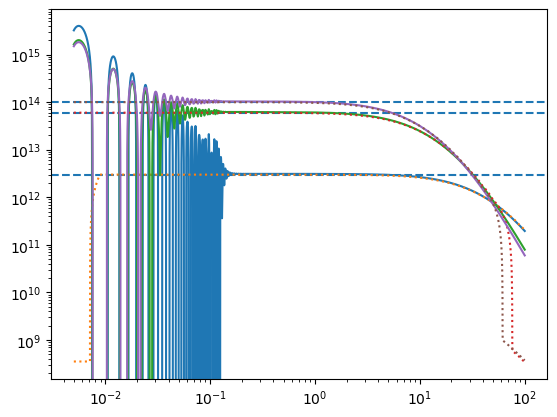

In [44]:
four_plot, four_plot2 = bd_fourier_false, bd_fourier[0]
for prof, prof2, mass in zip(four_plot, four_plot2, trial_M):
    plt.plot(trial_k, prof)
    plt.plot(trial_k, prof2, ':')
    plt.axhline(mass, linestyle='--', zorder=1)
plt.yscale('log')
plt.xscale('log');

## g

In [46]:
print(trial_M)

[3.e+12 6.e+13 1.e+14]


In [54]:
print('Should get:  $4 \\pi \\int^{\\infty}_0 r^2 g(r) dr = 1 $, when normalised by mass')
print('With Interpolator \n')#stellar: ', integrate.simpson(4*np.pi*(trial_r**2)*stel_real, x = trial_r)
print('bound: ', integrate.simpson(4*np.pi*(trial_r**2)*bd_real, x = trial_r)/trial_M)
print('gas: ', integrate.simpson(4*np.pi*(trial_r**2)*gas_real, x = trial_r)/trial_M, '\n\n Without interpolator')

print('stellar: ', integrate.simpson(4*np.pi*(trial_r**2)*stel_real, x = trial_r)/trial_M)
print('ejected: ', integrate.simpson(4*np.pi*(trial_r**2)*ej_real, x = trial_r)/trial_M)
print('bound: ', integrate.simpson(4*np.pi*(trial_r**2)*bd_real_noInterp, x = trial_r)/trial_M)
print('gas: ', integrate.simpson(4*np.pi*(trial_r**2)*gas_real_noInterp, x = trial_r)/trial_M)

Should get:  $4 \pi \int^{\infty}_0 r^2 g(r) dr = 1 $, when normalised by mass
With Interpolator 

bound:  [0.97655719 0.99859019 0.99897545]
gas:  [0.9859341  0.99915411 0.99938526] 

 Without interpolator
stellar:  [9.64514191e-10 9.64514191e-10 9.64514191e-10]
ejected:  [0.99999946 0.99999997 0.99999998]
bound:  [0.97710228 0.99914758 0.99953304]
gas:  [0.98626115 0.99948853 0.99971982]


#### g
Need to go back & fix up stelGas & bcm false_fouriers, but 1st: integrate others => should get M

In [196]:
print('Trapezoid method \n Analytical')
print('stellar: ', integrate.trapezoid(stel_fourier, x=trial_k))
print('ejected: ', integrate.trapezoid(ej_fourier, x=trial_k))
print('bound: ', integrate.trapezoid(bd_fourier, x=trial_k))
print('gas: ', integrate.trapezoid(gas_fourier, x=trial_k), '\n\n Numerical')

print('stellar: ', integrate.trapezoid(stel_fourier_false, x=trial_k))
print('ejected: ', integrate.trapezoid(ej_fourier_false, x=trial_k))
print('bound: ', integrate.trapezoid(bd_fourier_false, x=trial_k))
print('gas: ', integrate.trapezoid(gas_fourier_false, x=trial_k))

Trapezoid method 
 Analytical
stellar:  [2.99985e+14 5.99970e+15 9.99950e+15]
ejected:  [4.75116976e+12 3.48174445e+13 4.88653383e+13]
bound:  [[inf inf inf]]
gas:  [inf inf inf] 

 Numerical
stellar:  [2.16388172e+07 4.32776343e+08 7.21293906e+08]
ejected:  [4.80874485e+12 3.52342882e+13 4.94483856e+13]
bound:  [2.19492819e+13 1.31810123e+14 1.77624677e+14]
gas:  [2.19492819e+13 1.31810123e+14 1.77624677e+14]


In [198]:
print('Simpson method \n Analytical')
print('stellar: ', integrate.simpson(stel_fourier, x=trial_k))
print('ejected: ', integrate.simpson(ej_fourier, x=trial_k))
print('bound: ', integrate.simpson(bd_fourier, x=trial_k))
print('gas: ', integrate.simpson(gas_fourier, x=trial_k), '\n\n Numerical')

print('stellar: ', integrate.simpson(stel_fourier_false, x=trial_k))
print('ejected: ', integrate.simpson(ej_fourier_false, x=trial_k))
print('bound: ', integrate.simpson(bd_fourier_false, x=trial_k))
print('gas: ', integrate.simpson(gas_fourier_false, x=trial_k))

Simpson method 
 Analytical
stellar:  [2.99985e+14 5.99970e+15 9.99950e+15]
ejected:  [4.75116975e+12 3.48174444e+13 4.88653383e+13]
bound:  [[nan nan nan]]
gas:  [nan nan nan] 

 Numerical
stellar:  [2.16388184e+07 4.32776367e+08 7.21293946e+08]
ejected:  [4.80874485e+12 3.52342881e+13 4.94483856e+13]
bound:  [2.19492819e+13 1.31810122e+14 1.77624677e+14]
gas:  [2.19492819e+13 1.31810122e+14 1.77624677e+14]


# For NFW, get that $4 \pi \int^{\infty}_0 r^2\ g(r)\ dr\ \simeq 1$ as should

In [201]:
NFWprofile_false = ccl.halos.profiles.nfw.HaloProfileNFW(mass_def = hmd_200c, concentration = cM, fourier_analytic=False) 
NFWprofile_true = ccl.halos.profiles.nfw.HaloProfileNFW(mass_def = hmd_200c, concentration = cM, fourier_analytic=True) 

In [203]:
nfw_real_false = NFWprofile_false._real(cosmo, trial_r, trial_M, a=1)
nfw_fourier_false = NFWprofile_false.fourier(cosmo, trial_k, trial_M, a=1)

In [205]:
nfw_real_true = NFWprofile_false._real(cosmo, trial_r, trial_M, a=1)
nfw_fourier_true = NFWprofile_false.fourier(cosmo, trial_k, trial_M, a=1)

In [207]:
print('Masses (solar masses): ', trial_M)
print('Trapezoid method')
print('Analytical: ', integrate.simpson(nfw_fourier_true*trial_k**2, x=trial_k)/trial_M*4*np.pi)
print('Numerical: ', integrate.simpson(nfw_fourier_false, x=trial_k))

print('\nSimpson method')
print('Analytical: ', integrate.simpson(nfw_fourier_true, x=trial_k))
print('Numerical: ', integrate.simpson(nfw_fourier_false*4*np.pi*trial_k**2, x=trial_k)/trial_M)

Masses (solar masses):  [3.e+12 6.e+13 1.e+14]
Trapezoid method
Analytical:  [256456.55358097  36352.54432982  25289.28933789]
Numerical:  [6.31351755e+13 4.60458126e+14 6.40687624e+14]

Simpson method
Analytical:  [6.31351755e+13 4.60458126e+14 6.40687624e+14]
Numerical:  [256456.55358097  36352.54432982  25289.28933789]


In [209]:
print(trial_M / integrate.simpson(nfw_fourier_true, x=trial_k) )
print(trial_M - integrate.simpson(nfw_fourier_true, x=trial_k))
print(integrate.simpson(nfw_real_true*4*np.pi*trial_r**2, x=trial_r)/trial_M)

[0.04751709 0.13030501 0.1560823 ]
[-6.01351755e+13 -4.00458126e+14 -5.40687624e+14]
[0.98616499 0.99842835 0.99902432]


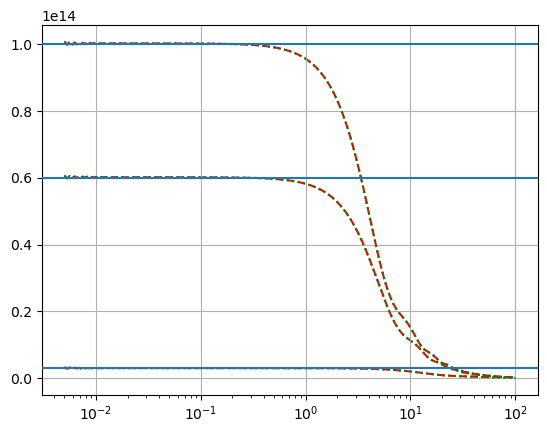

In [211]:
i = 0
for mass in zip(trial_M):
    plt.plot(trial_k, nfw_fourier_true[i], 'r--', zorder=1)
    plt.plot(trial_k, nfw_fourier_false[i], 'g:', zorder=2)
    plt.axhline(mass, zorder=3)
    i+=1
plt.grid(True)
plt.xscale('log');

$\rho(k)\ = \frac{M}{a^3} \bar{g}(k)\ $, where $\bar{g}(k \to 0)\ = 1 $ if normalised correctly.   
Here, using $a = 1$, so [profile/mass] = g(k)

In [214]:
for mass, prof in zip(trial_M, nfw_fourier_false):
    print(prof/mass)

[1.07183901 1.07185409 1.07186747 ... 0.02982888 0.02982138 0.02981389]
[1.00993748 1.00993897 1.00994028 ... 0.00327209 0.00327087 0.00326965]
[1.00725998 1.00726098 1.00726187 ... 0.00229443 0.00229477 0.00229511]


In [216]:
for mass, profA, profB, profR in zip(trial_M, nfw_fourier_true, nfw_fourier_false, nfw_real_true):
    print('       mass: ', mass, f';  {mass:.1g}')
    print('Real/Mass * 4*pi*r^2: ', integrate.simpson(4*np.pi*(trial_r**2)*profR/mass, x=trial_r), '\n___')
    print('Real/Mass: ', integrate.simpson(profR/mass, x=trial_r), '\n___')
    print('Analytical fourier/Mass: ', integrate.simpson(profA/mass, x=trial_r), '\n___')
    print('Analytical fourier/Mass * 4*pi*r^2: ', integrate.simpson(4*np.pi*(trial_r**2)*profA/mass, x=trial_r), '\n___')
    print('Numerical fourier/Mass: ', integrate.simpson(profB/mass, x=trial_r), '\n-----')
    

       mass:  3000000000000.0 ;  3e+12
Real/Mass * 4*pi*r^2:  0.9861649903132987 
___
Real/Mass:  27.080328338116015 
___
Analytical fourier/Mass:  7730614.677901178 
___
Analytical fourier/Mass * 4*pi*r^2:  1.6566730565451005e+23 
___
Numerical fourier/Mass:  7730614.677901178 
-----
       mass:  60000000000000.0 ;  6e+13
Real/Mass * 4*pi*r^2:  0.9984283537352867 
___
Real/Mass:  5.4284414170330955 
___
Analytical fourier/Mass:  1275039.7996805059 
___
Analytical fourier/Mass * 4*pi*r^2:  1.9564494236749356e+22 
___
Numerical fourier/Mass:  1275039.7996805059 
-----
       mass:  100000000000000.0 ;  1e+14
Real/Mass * 4*pi*r^2:  0.9990243150838364 
___
Real/Mass:  4.0160981336635055 
___
Analytical fourier/Mass:  911134.9268983336 
___
Analytical fourier/Mass * 4*pi*r^2:  1.3276222086029502e+22 
___
Numerical fourier/Mass:  911134.9268983336 
-----


For NFW, get that $4 \pi \int^{\infty}_0 r^2\ g(r)\ dr\ \simeq 1$ as should

# Check Bound Gas

In [65]:
bd_profile = BCMprofiles.BoundGasProfile(cosmo, hmd_200c, cM)
gamma_list = np.linspace(bd_profile.gammaRange[0], bd_profile.gammaRange[1], bd_profile.ngamma)
prof1 = bd_profile._real(cosmo, trial_r, 1E14, scale_a=1, Gamma=trial_gamma, call_interp=False)
prof2 = bd_profile._real(cosmo, trial_r, 1E14,  scale_a=1, Gamma=trial_gamma, call_interp=True)
print(prof1/prof2)
print(gamma_list)

False
[1.00055817 1.00055817 1.00055817 ... 1.00055817 1.00055817 1.00055817]
[ 3.          3.26984127  3.53968254  3.80952381  4.07936508  4.34920635
  4.61904762  4.88888889  5.15873016  5.42857143  5.6984127   5.96825397
  6.23809524  6.50793651  6.77777778  7.04761905  7.31746032  7.58730159
  7.85714286  8.12698413  8.3968254   8.66666667  8.93650794  9.20634921
  9.47619048  9.74603175 10.01587302 10.28571429 10.55555556 10.82539683
 11.0952381  11.36507937 11.63492063 11.9047619  12.17460317 12.44444444
 12.71428571 12.98412698 13.25396825 13.52380952 13.79365079 14.06349206
 14.33333333 14.6031746  14.87301587 15.14285714 15.41269841 15.68253968
 15.95238095 16.22222222 16.49206349 16.76190476 17.03174603 17.3015873
 17.57142857 17.84126984 18.11111111 18.38095238 18.65079365 18.92063492
 19.19047619 19.46031746 19.73015873 20.        ]


In [71]:
help(bd_profile)

Help on BoundGasProfile in module BCMprofiles_Copy3 object:

class BoundGasProfile(pyccl.halos.profiles.profile_base.HaloProfile)
 |  BoundGasProfile(self, cosmo, mass_def, concentration, fourier_analytic=True, gammaRange=(3, 20), ngamma=64, qrange=(0.0001, 100.0), nq=64, limInt=(0.0001, 10000.0))
 |
 |  Creating a class for the bound gas density profile where:
 |  .. math::
 |      \rho_b(r)\ = Ma ^{-3} & g_b(r)\ = \frac{1}{V_b} \left( \frac{log(1 + \frac{r}{r_s})}{\frac{r}{r_s}} \right)^{\frac{1}{\Gamma - 1}}     , where log \equiv ln.
 |      V_b \equiv 4\pi r_s^3 I_b(\frac{1}{\Gamma - 1}, 0)\ .
 |      I_b(\gamma, q)\ = \int^{\infty}_0 dx\ x^2 \left( \frac{log(1+x)}{x} \right)^{\gamma} j_0(qx)\, with q = kr_s [in Fourier space].
ight)^{rac{1}{\Gamma - 1}}amma - 1}, 0)\ = \int^{\infty}_0 dx\ x^2 \left( \frac{log(1+x)}{x} \right)^{\frac{1}{\Gamma - 1}} j_0(0)\  = \int^{\infty}_0 dx\ x^2 \left( rac{log(1+x)}{x} 
 |      As j_0 is a Besel function, & j_0(0)\ = 1 .
 |
 |  Therefore:
 

/var/folders/fj/p1qj16jj5pl9df1rgw6p12tc000vry/T/ipykernel_77073/3677888448.py:11: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  I0_array[i] =  integrate.quad(bd_profile._innerInt, 1E-5, 1E5, args = 1/(g-1))[0]


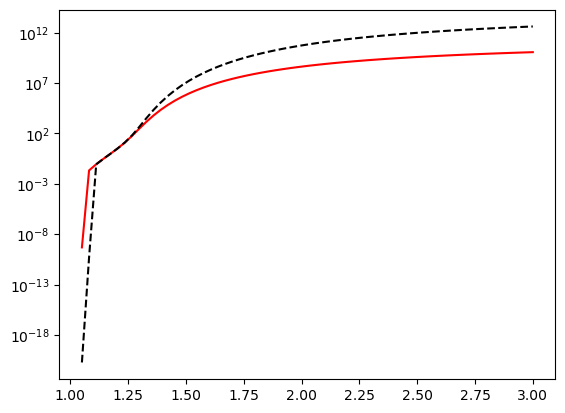

In [67]:
I0_array = np.zeros(bd_profile.ngamma)
gamma_list = np.linspace(1.05, 3, 64)
#gamma_list = np.linspace(bd_profile.GammaRange[0], bd_profile.GammaRange[1], bd_profile.nGamma)

for i, g in enumerate(gamma_list):
    I0_array[i] =  integrate.quad(bd_profile._innerInt, 1E-4, 1E4, args = 1/(g-1))[0]
#func_normQ0 = interpol.interp1d(gamma_list, I0_array)
plt.plot(gamma_list, I0_array, 'r-')

for i, g in enumerate(gamma_list):
    I0_array[i] =  integrate.quad(bd_profile._innerInt, 1E-5, 1E5, args = 1/(g-1))[0]
#func_normQ0 = interpol.interp1d(gamma_list, I0_array)
plt.plot(gamma_list, I0_array, 'k--')
plt.yscale('log')

In [73]:
bd_profile._norm_interpol2

<bound method BoundGasProfile._norm_interpol2 of <BCMprofiles_Copy3.BoundGasProfile object at 0x1517f7a70>>

#### THERE DOES SEEM TO BE A PROBLEM WITH THE INTERPOLATOR

In [56]:
print('Masses are:', trial_M)
print('        $4 \\pi \\int^{\\infty}_0 r^2 g(r) dr$')
print('With interpolator: ', integrate.simpson(4*np.pi*(trial_r**2)*bd_real, x = trial_r))
print('Without interpolator: ', integrate.simpson(4*np.pi*(trial_r**2)*bd_real_noInterp, x = trial_r))
print('        Normalised by mass')
print('With interpolator: ', integrate.simpson(4*np.pi*(trial_r**2)*bd_real, x = trial_r)/trial_M)
print('Without interpolator: ', integrate.simpson(4*np.pi*(trial_r**2)*bd_real_noInterp, x = trial_r)/trial_M)

Masses are: [3.e+12 6.e+13 1.e+14]
        $4 \pi \int^{\infty}_0 r^2 g(r) dr$
With interpolator:  [2.92967158e+12 5.99154116e+13 9.98975446e+13]
Without interpolator:  [2.93130684e+12 5.99488545e+13 9.99533043e+13]
        Normalised by mass
With interpolator:  [0.97655719 0.99859019 0.99897545]
Without interpolator:  [0.97710228 0.99914758 0.99953304]


In [59]:
print((integrate.simpson(4*np.pi*(trial_r**2)*bd_real_noInterp, x = trial_r)/trial_M) / (integrate.simpson(4*np.pi*(trial_r**2)*bd_real, x = trial_r)/trial_M))

[1.00055817 1.00055817 1.00055817]


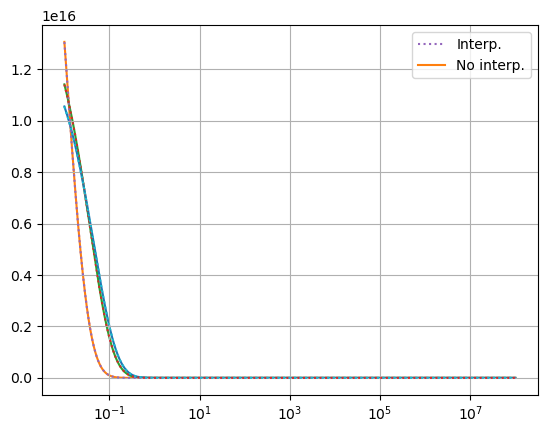

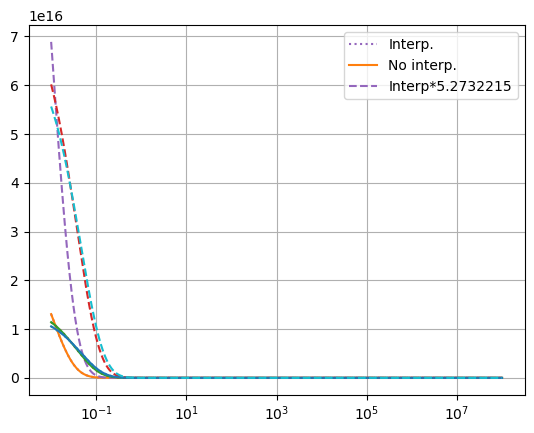

In [61]:
colour1, colour2 = ['tab:purple','tab:red','tab:cyan'], ['tab:orange','tab:green','tab:blue']
for mass, col1, col2, interp, nointerp in zip(trial_M, colour1, colour2, bd_real, bd_real_noInterp):
    plt.plot(trial_r, interp, ':', color=col1)#, label=f'Interpolated: {mass:.1g} $M \\odot $')
    plt.plot(trial_r, nointerp, color=col2, zorder=1)#, label=f'No interp.: {mass:.1g} $M \\odot $');
plt.legend(['Interp.', 'No interp.'], loc='best')
plt.grid(True)
plt.xscale('log');

plt.figure()
for mass, col1, col2, interp, nointerp in zip(trial_M, colour1, colour2, bd_real, bd_real_noInterp):
    plt.plot(trial_r, interp, ':', color=col1)#, label=f'Interpolated: {mass:.1g} $M \\odot $')
    plt.plot(trial_r, nointerp, color=col2)#, label=f'No interp.: {mass:.1g} $M \\odot $');
    plt.plot(trial_r, interp*5.2732215, '--', color=col1)#, label=f'Interpolated*5.2732215 : {mass:.1g} $M \\odot $')
plt.legend(['Interp.', 'No interp.', 'Interp*5.2732215'], loc='best')
plt.grid(True)
plt.xscale('log');


#### g

In [229]:
print('Masses (solar masses): ', trial_M)
print('Trapezoid method')
print('Analytical: ', integrate.simpson(bd_fourier, x=trial_k))
print('Numerical: ', integrate.simpson(bd_fourier_false, x=trial_k))

print('\nSimpson method')
print('Analytical: ', integrate.simpson(bd_fourier, x=trial_k))
print('Numerical: ', integrate.simpson(bd_fourier_false, x=trial_k))

Masses (solar masses):  [3.e+12 6.e+13 1.e+14]
Trapezoid method
Analytical:  [[nan nan nan]]
Numerical:  [2.19492819e+13 1.31810122e+14 1.77624677e+14]

Simpson method
Analytical:  [[nan nan nan]]
Numerical:  [2.19492819e+13 1.31810122e+14 1.77624677e+14]


In [230]:
for mass, profA, profB, profR in zip(trial_M, bd_fourier[0], bd_fourier_false, bd_real):
    print('       mass: ', mass, f';  {mass:.1g}')
    print('Real/Mass * 4*pi*r^2: ', integrate.simpson(4*np.pi*(trial_r**2)*profR/mass, x=trial_r), '\n___')
    print('Real/Mass: ', integrate.simpson(profR/mass, x=trial_r), '\n___')
    print('Analytical fourier/Mass: ', integrate.simpson(profA/mass, x=trial_r), '\n___')
    print('Analytical fourier/Mass * 4*pi*r^2: ', integrate.simpson(4*np.pi*(trial_r**2)*profA/mass, x=trial_r), '\n___')
    print('Numerical fourier/Mass: ', integrate.simpson(profB/mass, x=trial_r), '\n-----')
    

       mass:  3000000000000.0 ;  3e+12
Real/Mass * 4*pi*r^2:  0.18529513289911434 
___
Real/Mass:  11.891164989553728 
___
Analytical fourier/Mass:  nan 
___
Analytical fourier/Mass * 4*pi*r^2:  nan 
___
Numerical fourier/Mass:  3515032.753611079 
-----
       mass:  60000000000000.0 ;  6e+13
Real/Mass * 4*pi*r^2:  0.18947574567095557 
___
Real/Mass:  1.6420492927177393 
___
Analytical fourier/Mass:  nan 
___
Analytical fourier/Mass * 4*pi*r^2:  nan 
___
Numerical fourier/Mass:  334491.2793910221 
-----
       mass:  100000000000000.0 ;  1e+14
Real/Mass * 4*pi*r^2:  0.18954884468913394 
___
Real/Mass:  1.1184340000513 
___
Analytical fourier/Mass:  nan 
___
Analytical fourier/Mass * 4*pi*r^2:  nan 
___
Numerical fourier/Mass:  210343.93319038532 
-----


# Now look at integration of stellar

In [236]:
print('Masses (solar masses): ', trial_M)
print('Trapezoid method')
print('Analytical: ', integrate.simpson(stel_fourier, x=trial_k))
print('Numerical: ', integrate.simpson(stel_fourier_false, x=trial_k))

print('\nSimpson method')
print('Analytical: ', integrate.simpson(stel_fourier, x=trial_k))
print('Numerical: ', integrate.simpson(stel_fourier_false, x=trial_k))

Masses (solar masses):  [3.e+12 6.e+13 1.e+14]
Trapezoid method
Analytical:  [2.99985e+14 5.99970e+15 9.99950e+15]
Numerical:  [2.16388184e+07 4.32776367e+08 7.21293946e+08]

Simpson method
Analytical:  [2.99985e+14 5.99970e+15 9.99950e+15]
Numerical:  [2.16388184e+07 4.32776367e+08 7.21293946e+08]


In [238]:
for mass, profA, profB in zip(trial_M, stel_fourier, stel_fourier_false):
    print(mass)
    print(profA/mass)
    print(profB/mass)
    

3000000000000.0
[1. 1. 1. ... 1. 1. 1.]
[-1.89605762e-02 -1.89528467e-02 -1.89451128e-02 ...  3.94364844e-11
  3.94366440e-11  3.94368037e-11]
60000000000000.0
[1. 1. 1. ... 1. 1. 1.]
[-1.89605762e-02 -1.89528467e-02 -1.89451128e-02 ...  3.94364844e-11
  3.94366440e-11  3.94368037e-11]
100000000000000.0
[1. 1. 1. ... 1. 1. 1.]
[-1.89605762e-02 -1.89528467e-02 -1.89451128e-02 ...  3.94364844e-11
  3.94366440e-11  3.94368037e-11]


In [240]:
print('Masses (solar masses): ', trial_M)
print('Trapezoid method')
print('Analytical: ', integrate.simpson(stel_real, x=trial_r))
#print('Numerical: ', integrate.simpson(stel_fourier_false, x=trial_k))

print('\nSimpson method')
print('Analytical: ', integrate.simpson(stel_real, x=trial_r))
#print('Numerical: ', integrate.simpson(stel_fourier_false, x=trial_k))

Masses (solar masses):  [3.e+12 6.e+13 1.e+14]
Trapezoid method
Analytical:  [ 2302608.01731347 46052160.34626944 76753600.57711573]

Simpson method
Analytical:  [ 2302608.01731347 46052160.34626944 76753600.57711573]


In [242]:
for mass, profA, profB, profR in zip(trial_M, stel_fourier, stel_fourier_false, stel_real):
    print('       mass: ', mass, f';  {mass:.1g}')
    print('Real/Mass * 4*pi*r^2: ', integrate.simpson(4*np.pi*(trial_r**2)*profR/mass, x=trial_r), '\n___')
    print('Real/Mass: ', integrate.simpson(profR/mass, x=trial_r), '\n___')
    print('Analytical fourier/Mass: ', integrate.simpson(profA/mass, x=trial_r), '\n___')
    print('Analytical fourier/Mass * 4*pi*r^2: ', integrate.simpson(4*np.pi*(trial_r**2)*profA/mass, x=trial_r), '\n___')
    print('Numerical fourier/Mass: ', integrate.simpson(profB/mass, x=trial_r), '\n-----')
    

       mass:  3000000000000.0 ;  3e+12
Real/Mass * 4*pi*r^2:  9.645141908385284e-10 
___
Real/Mass:  7.675360057711572e-07 
___
Analytical fourier/Mass:  99999999.99 
___
Analytical fourier/Mass * 4*pi*r^2:  4.188790204786391e+24 
___
Numerical fourier/Mass:  0.00401097774456718 
-----
       mass:  60000000000000.0 ;  6e+13
Real/Mass * 4*pi*r^2:  9.645141908385284e-10 
___
Real/Mass:  7.675360057711572e-07 
___
Analytical fourier/Mass:  99999999.99 
___
Analytical fourier/Mass * 4*pi*r^2:  4.188790204786391e+24 
___
Numerical fourier/Mass:  0.004010977744567168 
-----
       mass:  100000000000000.0 ;  1e+14
Real/Mass * 4*pi*r^2:  9.645141908385284e-10 
___
Real/Mass:  7.675360057711572e-07 
___
Analytical fourier/Mass:  99999999.99 
___
Analytical fourier/Mass * 4*pi*r^2:  4.188790204786391e+24 
___
Numerical fourier/Mass:  0.004010977744567212 
-----


See that $4 \pi \int^{\infty}_0 r^2 g(r)\ dr \simeq 1 \times 10^{-9}$ & $\int^{\infty}_0 g(k)\ dr \simeq 1 \times 10^{9}$ for stellar.    
(even though, $\rho(k)\ $ goes with *$dk$*)

In [245]:
print(99999999.99 , 1/99999999.99 )
print(9.645141908385284e-10 , 1/9.645141908385284e-10 , f' {1/9.645141908385284e-10:.3g} ')

99999999.99 1.0000000001e-08
9.645141908385284e-10 1036791381.0896044  1.04e+09 
